## Imports

In [11]:
import math

import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load data

In [15]:
car_dist_df = pd.read_csv('car_dist.csv')
# factors_all_df.reset_index(drop=True, inplace=True)
car_dist_df.index = car_dist_df['year']
car_dist_df.drop(columns=['year'], inplace=True)
car_dist_df


,y
year,
1990,588
1991,582
1992,583
1993,607
1994,614
1995,618
1996,622
1997,632
1998,636


In [16]:
ebike_sales_df = pd.read_csv('factors.csv')
ebike_sales_df = ebike_sales_df[['year', 'ebike_sales']]
ebike_sales_df.index = ebike_sales_df['year']
ebike_sales_df.drop(columns=['year'], inplace=True)
ebike_sales_df


,ebike_sales
year,
2006,98
2007,173
2008,279
2009,422
2010,588
2011,716
2012,854
2013,907
2014,1139


In [23]:
data_df = pd.concat([car_dist_df, ebike_sales_df], axis=1)
data_df.columns = ['car_dist', 'ebike_sales']
# crop data to rows without NaN
data_df = data_df[~data_df.isna().any(axis=1)]
# drop 2022 because covid
data_df = data_df[:-1]
data_df

,car_dist,ebike_sales
year,,
2006,670.0,98.0
2007,672.0,173.0
2008,664.0,279.0
2009,659.0,422.0
2010,644.0,588.0
2011,645.0,716.0
2012,649.0,854.0
2013,645.0,907.0
2014,659.0,1139.0


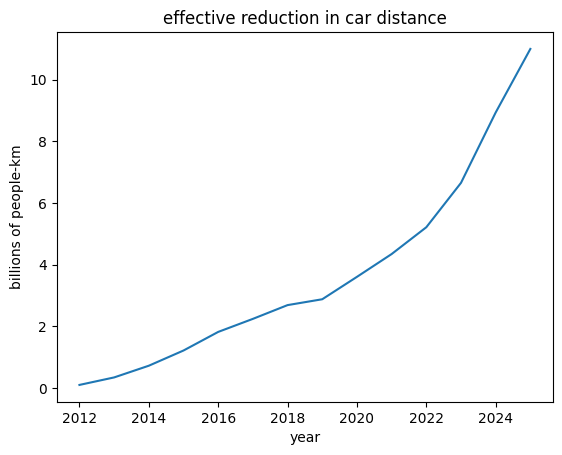

In [98]:
# plot data
plt.plot(data_df.index + 6, (data_df['ebike_sales'] - data_df['car_dist']) / 300 + 2)
plt.title('effective reduction in car distance')
plt.xlabel('year')
plt.ylabel('billions of people-km')
plt.show()

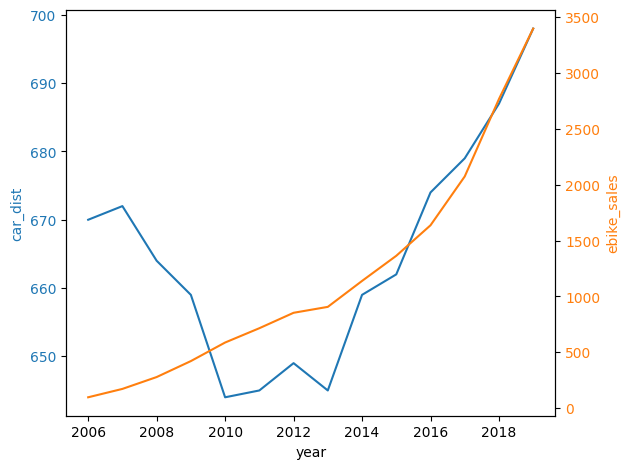

In [31]:
# plot the dataframe with two y axes for car_dist and ebike_sales
fig, ax1 = plt.subplots()
ax1.plot(data_df.index, data_df['car_dist'], color='tab:blue')
ax1.set_xlabel('year')
ax1.set_ylabel('car_dist', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(data_df.index, data_df['ebike_sales'], color='tab:orange')
ax2.set_ylabel('ebike_sales', color='tab:orange')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='tab:orange')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Predictions

In [59]:
# fit simple linear regression model to predict future car_dist
# based on data from 2013 onwards
cropped_df = data_df.loc[2013:]
cropped_df.reset_index(inplace=True)
model = LinearRegression()
model.fit(cropped_df[['year']], cropped_df[['car_dist']])
print(model.coef_, model.intercept_)

[[8.28571429]] [-16032.]


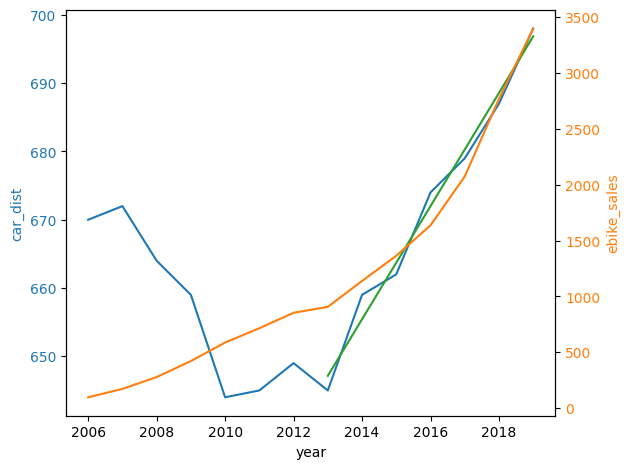

In [60]:
# plot the dataframe with two y axes for car_dist and ebike_sales
fig, ax1 = plt.subplots()
ax1.plot(data_df.index, data_df['car_dist'], color='tab:blue')
ax1.set_xlabel('year')
ax1.set_ylabel('car_dist', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(data_df.index, data_df['ebike_sales'], color='tab:orange')
ax2.set_ylabel('ebike_sales', color='tab:orange')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='tab:orange')
# plot regression line (use same x values as car_dist)
ax1.plot(cropped_df['year'], model.predict(cropped_df[['year']]), color='tab:green')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Predictions Comparison

In [61]:
def tilted_sig_func(x):
    x_ctr = 2019.26
    slope = 690.991
    y_min = 2030.02
    y_max = 7000.
    exp = 2.01
    t = 83.

    return ((x - x_ctr) / (
            slope**-exp + (2 * abs(x - x_ctr) / (y_max - y_min))**exp
    ) ** (1 / exp)) + (y_max - y_min) / 2 + y_min + t * x - t * y_min

In [67]:
PRED_YEARS = pd.DataFrame(range(2019, 2030))


C:\Users\yiqia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


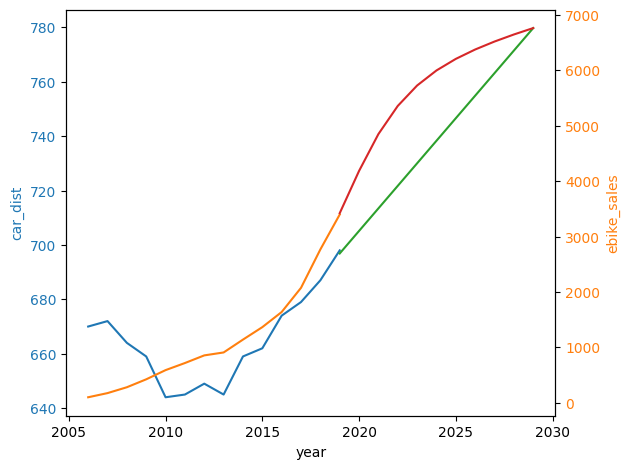

In [68]:
# plot the dataframe with two y axes for car_dist and ebike_sales
fig, ax1 = plt.subplots()
ax1.plot(data_df.index, data_df['car_dist'], color='tab:blue')
ax1.set_xlabel('year')
ax1.set_ylabel('car_dist', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(data_df.index, data_df['ebike_sales'], color='tab:orange')
ax2.set_ylabel('ebike_sales', color='tab:orange')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='tab:orange')
# plot regression line (use same x values as car_dist)
ax1.plot(PRED_YEARS, model.predict(PRED_YEARS), color='tab:green')
# plot tilted sigmoid line
ax2.plot(PRED_YEARS, tilted_sig_func(PRED_YEARS), color='tab:red')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
